<a href="https://colab.research.google.com/github/santiagoahl/clustering-algorithms/blob/main/02_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>[Data preprocessing](#scrollTo=YoyaMxqX0-Ew)

>[Data-viz](#scrollTo=Z1QpvcHC1rtV)

>[K Means](#scrollTo=66rfUnIq2zQu)

>[Find the best K](#scrollTo=k1qs4Pi14buw)

>>[Elbow method](#scrollTo=ygcmpk2A56tR)

>>[Silhouette score](#scrollTo=1R8OVnPe6-c5)

>[Testing](#scrollTo=pgziRlRB7xgm)



# Data preprocessing

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
X, y, c = make_blobs(500, cluster_std=0.7, centers=4, n_features=2, return_centers=True)

In [ ]:
df_blobs = pd.DataFrame({
    'x1': X[:, 0],
    'x2': X[:, 1],
    'y': y
})

In [ ]:
df_blobs.head()

,x1,x2,y
0,-4.587771,4.053355,2
1,-2.807439,4.862030,3
2,-3.667205,5.943461,3
3,-4.198630,6.264121,3
4,-2.125643,5.689841,3


In [ ]:
df_centers = pd.DataFrame({
    'x1': c[:, 0],
    'x2': c[:, 1],
})

# Data-viz

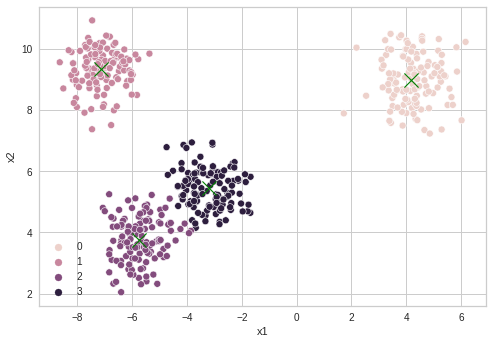

In [ ]:
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='y')
sns.scatterplot(data=df_centers, x='x1', y='x2', color='green', marker='x', s=200)
plt.show()

# K Means

In [ ]:
kmeans = KMeans(n_clusters=4)
df_cluster = kmeans.fit_predict(X)
df_blobs['cluster'] = df_cluster
k_means_center = kmeans.cluster_centers_
df_k_means_center = pd.DataFrame({
    'x1': k_means_center[:, 0],
    'x2': k_means_center[:, 1]
})

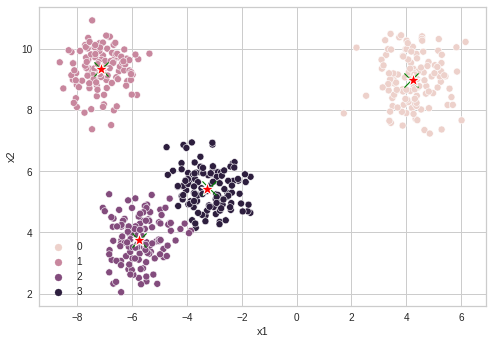

In [ ]:
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='y')
sns.scatterplot(data=df_centers, x='x1', y='x2', color='green', marker='x', s=200)
sns.scatterplot(data=df_k_means_center, x='x1', y='x2', color='red', marker='*', s=200)
plt.show()

In [ ]:
df_centers

,x1,x2
0,9.903481,2.605583
1,-6.099074,5.330132
2,2.840259,8.386269
3,7.563727,2.356097


In [ ]:
df_k_means_center

,x1,x2
0,-6.084020,5.364107
1,9.904777,2.602146
2,2.844889,8.473745
3,7.466390,2.333948


# Find the best K

Elbow method

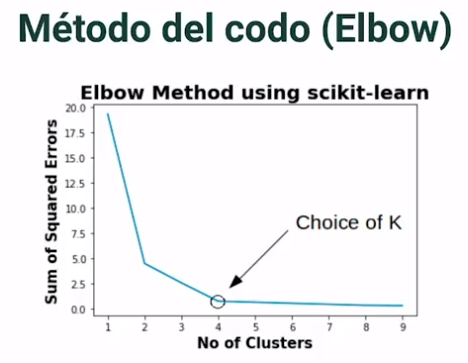

WCSS

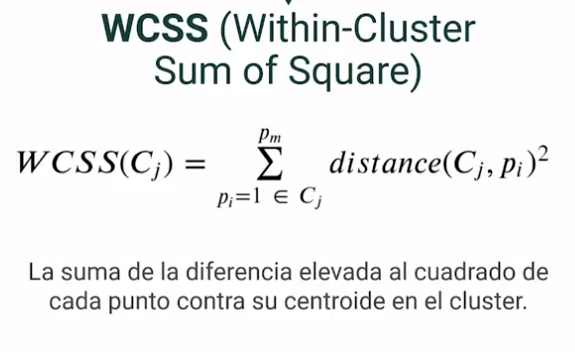

We will also work with silhouette coefficient.

In [ ]:
def cluster_viz(k):
  kmeans = KMeans(n_clusters=k)
  df_cluster = kmeans.fit_predict(X)
  df_blobs['cluster'] = df_cluster
  k_means_center = kmeans.cluster_centers_
  df_k_means_center = pd.DataFrame({
      'x1': k_means_center[:, 0],
      'x2': k_means_center[:, 1]
  })
  sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='y')
  sns.scatterplot(data=df_centers, x='x1', y='x2', color='green', marker='x', s=200)
  sns.scatterplot(data=df_k_means_center, x='x1', y='x2', color='red', marker='*', s=200)
  plt.show()

3


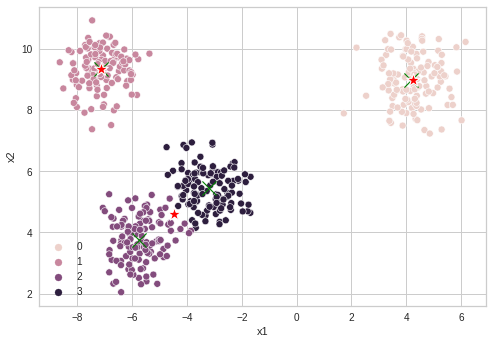

4


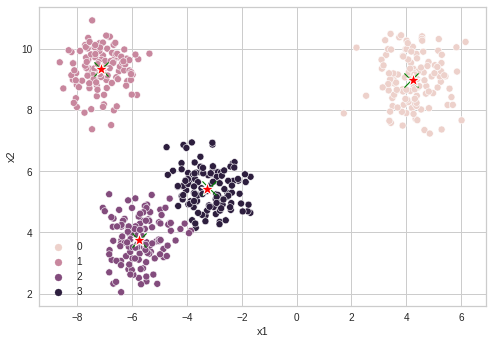

5


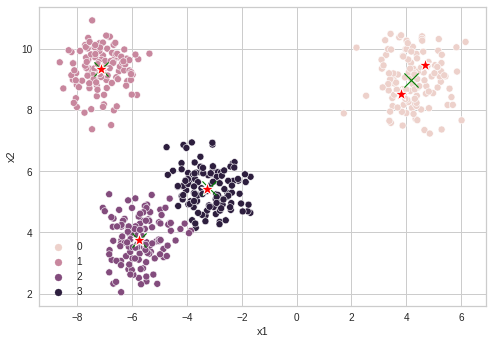

6


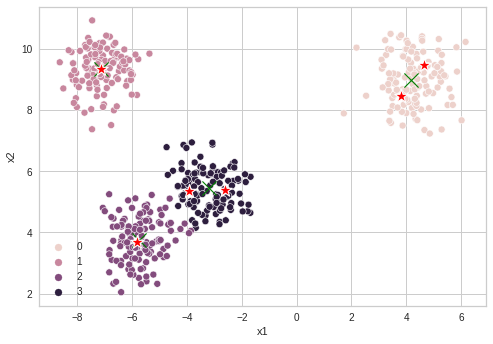

7


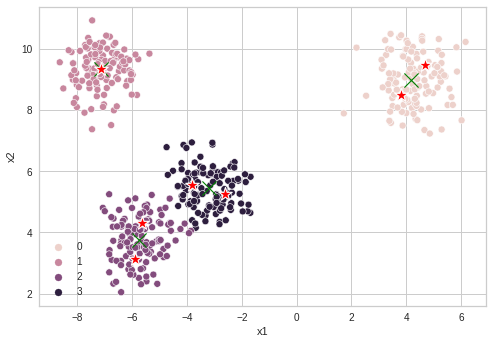

8


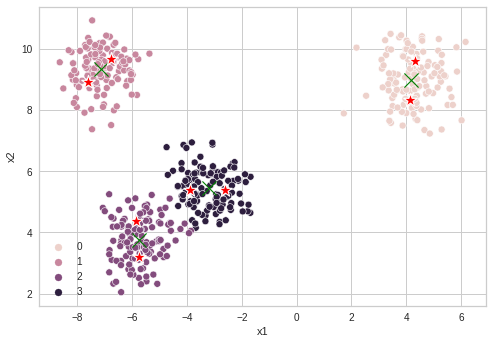

9


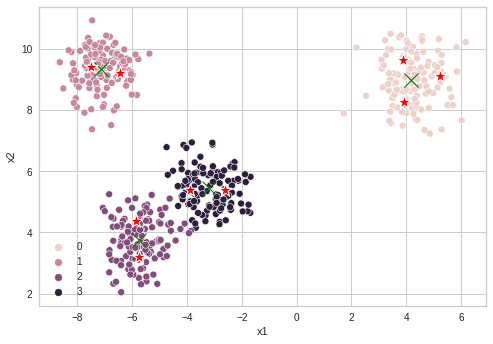

In [ ]:
for k in range(3, 10):
  print(k)
  cluster_viz(k)

## Elbow method

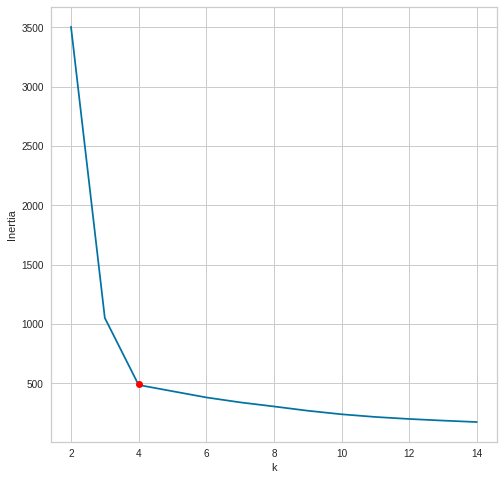

In [ ]:
distances = []
K = range(2, 15)
for k in K:
  kmeans = KMeans(n_clusters=k)
  kmeans = kmeans.fit(X)
  distances.append(kmeans.inertia_)  

plt.figure(figsize=(8, 8))
plt.plot(K, distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.plot([4], [495], marker='o', color='red')
plt.show()

## Silhouette score

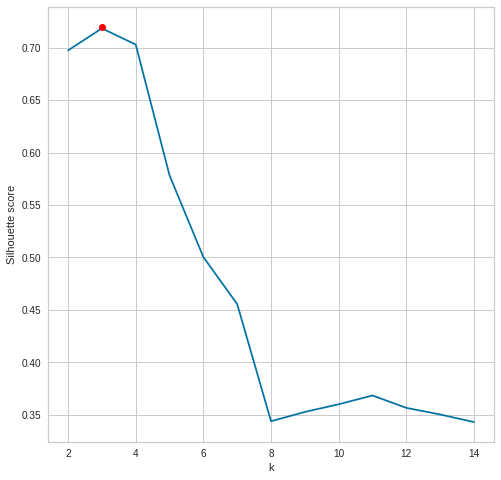

In [ ]:
silhouette = []
K = range(2, 15)
for k in K:
  kmeans = KMeans(n_clusters=k)
  kmeans = kmeans.fit(X)
  y = kmeans.predict(X)
  silhouette.append(silhouette_score(X, y))  

plt.figure(figsize=(8, 8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.plot([3], [0.72], marker='o', color='red')
plt.show()

# Testing

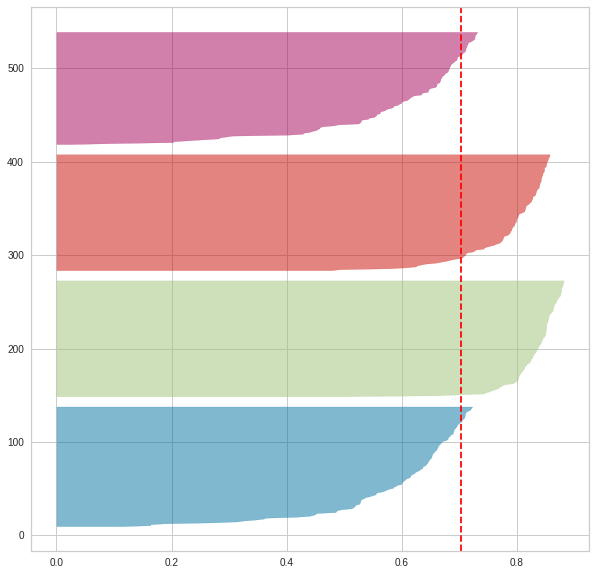

In [ ]:
plt.figure(figsize=(10, 10))
kmeans = KMeans(n_clusters=4)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)
plt.show()